In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader

from pandas_datareader import data as web
import yfinance as yf
import mplfinance as mpf
yf.pdr_override()

In [223]:
stock_name = 'NVDA'

In [224]:
start = '2022-01-01'
end = '2021-12-31'
data_yh = web.get_data_yahoo(stock_name, start = start)
data_yh.columns = ['open', 'high', 'low', 'close', 'adjclose', 'volume']
data_yh.head()

[*********************100%***********************]  1 of 1 completed


,open,high,low,close,adjclose,volume
Date,,,,,,
2021-12-31,296.739990,300.299988,293.309998,294.109985,293.785339,26653000
2022-01-03,298.149994,307.109985,297.850006,301.209991,300.877502,39154700
2022-01-04,302.769989,304.679993,283.489990,292.899994,292.576691,52715400
2022-01-05,289.489990,294.160004,275.329987,276.040009,275.735321,49806400
2022-01-06,276.399994,284.380005,270.649994,281.779999,281.468964,45418600


api_key = '88077VO3V57JW1I3'
ts = TimeSeries(key = api_key, output_format = 'pandas')
data1, metadata1 = ts.get_daily_adjusted(symbol= 'NVDA', outputsize='full')

cc = CryptoCurrencies(key = api_key, output_format= 'pandas')
data2, metadata2 = cc.get_digital_currency_daily(symbol= 'BTC', market= 'USD')
#data2

In [225]:
data_yh = data_yh.sort_index()
data_yh.columns = ['open', 'high', 'low', 'close', 'adjusted close', 'volume']

In [226]:
data_yh

,open,high,low,close,adjusted close,volume
Date,,,,,,
2021-12-31,296.739990,300.299988,293.309998,294.109985,293.785339,26653000
2022-01-03,298.149994,307.109985,297.850006,301.209991,300.877502,39154700
2022-01-04,302.769989,304.679993,283.489990,292.899994,292.576691,52715400
2022-01-05,289.489990,294.160004,275.329987,276.040009,275.735321,49806400
2022-01-06,276.399994,284.380005,270.649994,281.779999,281.468964,45418600
...,...,...,...,...,...,...
2023-05-22,309.010010,315.200012,306.799988,311.760010,311.760010,37200000
2023-05-23,310.000000,312.880005,306.309998,306.880005,306.880005,35625300
2023-05-24,302.100006,306.070007,298.059998,305.380005,305.380005,72141900


<AxesSubplot:xlabel='Date', ylabel='adjusted close'>

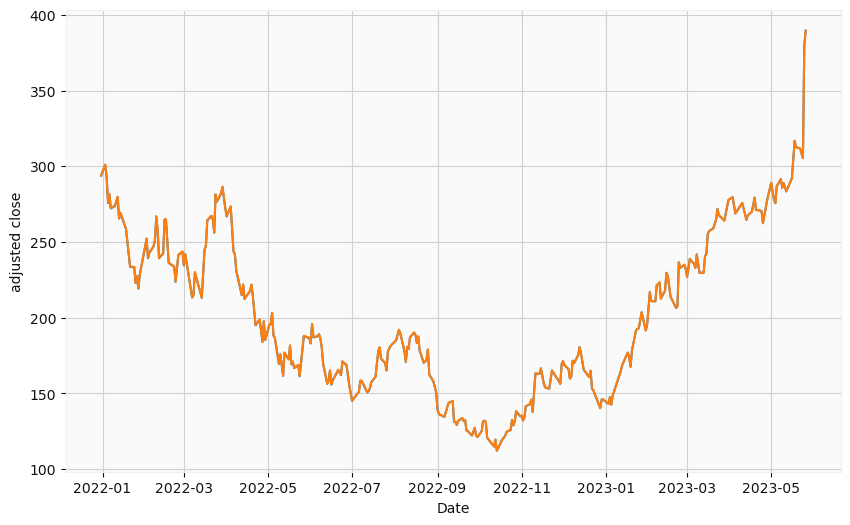

In [227]:
g = plt.figure(figsize = (10,6))
sns.lineplot(data = data_yh, x = data_yh.index, y = 'adjusted close')
sns.lineplot(data = data_yh, x = data_yh.index, y = 'close')

cc = CryptoCurrencies(key=api_key, output_format='pandas')
data, meta_data = cc.get_digital_currency_daily(symbol='BTC', market = 'USD')
data['4b. close (USD)'].plot()
plt.tight_layout()
plt.title('Daily close value for bitcoin (BTC)')
plt.grid()
plt.show()

In [228]:
def macd_func(df, a = 12, b = 21, c = 9):
  EMA_short = df['adjusted close'].ewm(span=a, adjust=False, min_periods = a + 1).mean()
  EMA_long = df['adjusted close'].ewm(span = b, adjust = False, min_periods = b + 1).mean()
  MACD = EMA_short - EMA_long
  signal = MACD.ewm(span = c, adjust = False, min_periods = c + 1).mean()
  
  df['macd'] = MACD
  df['signal_line'] = signal
  df['histogram'] = df['macd'] - df['signal_line']
  
  #find an entry point
  df['shift_hist'] = df['histogram'].shift(1) #Compare previous and current bar

  df.loc[(df['histogram']> 0) & (df['shift_hist'] < 0 ), 'action'] = 'buy'
  df.loc[(df['histogram']< 0) & (df['shift_hist'] > 0 ), 'action'] = 'sell'
  
  #Identify marker position for graph plotting
  df.loc[df['action'] == 'buy', 'marker_position'] = df['low'] * 0.98
  df.loc[df['action'] == 'sell', 'marker_position'] = df['high'] * 1.02


  return df

In [229]:
df_signal = macd_func(data_yh)
df_signal[df_signal.action.notnull()]

,open,high,low,close,adjusted close,volume,macd,signal_line,histogram,shift_hist,action,marker_position
Date,,,,,,,,,,,,
2022-02-23,238.020004,241.550003,223.009995,223.869995,223.622879,56651100,-3.852478,-3.004777,-0.847700,0.136025,sell,246.381003
2022-02-28,239.919998,246.649994,237.070007,243.850006,243.580841,47731900,-3.132992,-3.228976,0.095984,-0.306440,buy,232.328607
2022-03-01,242.910004,243.770004,231.320007,234.770004,234.510834,41205600,-3.331998,-3.249580,-0.082417,0.095984,sell,248.645404
2022-03-02,237.559998,244.089996,234.149994,242.199997,241.973862,38964200,-2.968777,-3.193420,0.224643,-0.082417,buy,229.466994
2022-03-04,233.839996,236.800003,224.820007,229.360001,229.145859,43141500,-3.411608,-3.200673,-0.210935,0.181920,sell,241.536003
2022-03-16,235.000000,245.970001,231.720001,244.960007,244.731293,67142200,-3.451505,-4.523196,1.071691,-0.223307,buy,227.085601
2022-04-05,272.540009,273.190002,258.200012,259.309998,259.067871,43661500,5.901870,6.180301,-0.278432,0.860871,sell,278.653802
2022-05-04,199.229996,204.000000,187.509995,203.339996,203.150146,64885500,-9.497240,-9.984181,0.486941,-0.486457,buy,183.759795
2022-05-09,180.339996,182.550003,168.270004,169.500000,169.341736,64445500,-10.313780,-9.889932,-0.423848,0.380610,sell,186.201003


In [230]:
def macd_plot(df_plot):
  df = macd_func(df_plot)
  #for plot MACD
  mpf_macd = mpf.make_addplot(df['macd'], panel = 1, color = 'blue', title ='MACD')
  mpf_signal = mpf.make_addplot(df['signal_line'], panel = 1 ,color = 'orange')

  colors = ['green' if value >= 0 else 'red' for value in df["histogram"]]
  mpf_histogram = mpf.make_addplot(df['histogram'],type='bar',panel = 1,color = colors)

  #for marker
  markers = ['^' if x == 'buy' else 'v' for x in df['action']] 
  color_marker = ['green' if x == 'buy' else 'red' for x in df['action']]
  plot_signal = mpf.make_addplot(df['marker_position'],type='scatter',markersize= 30, marker=markers,color=color_marker)

  plots = [mpf_macd, mpf_signal, mpf_histogram,plot_signal]

  return plots

In [231]:
g = macd_plot(data_yh)

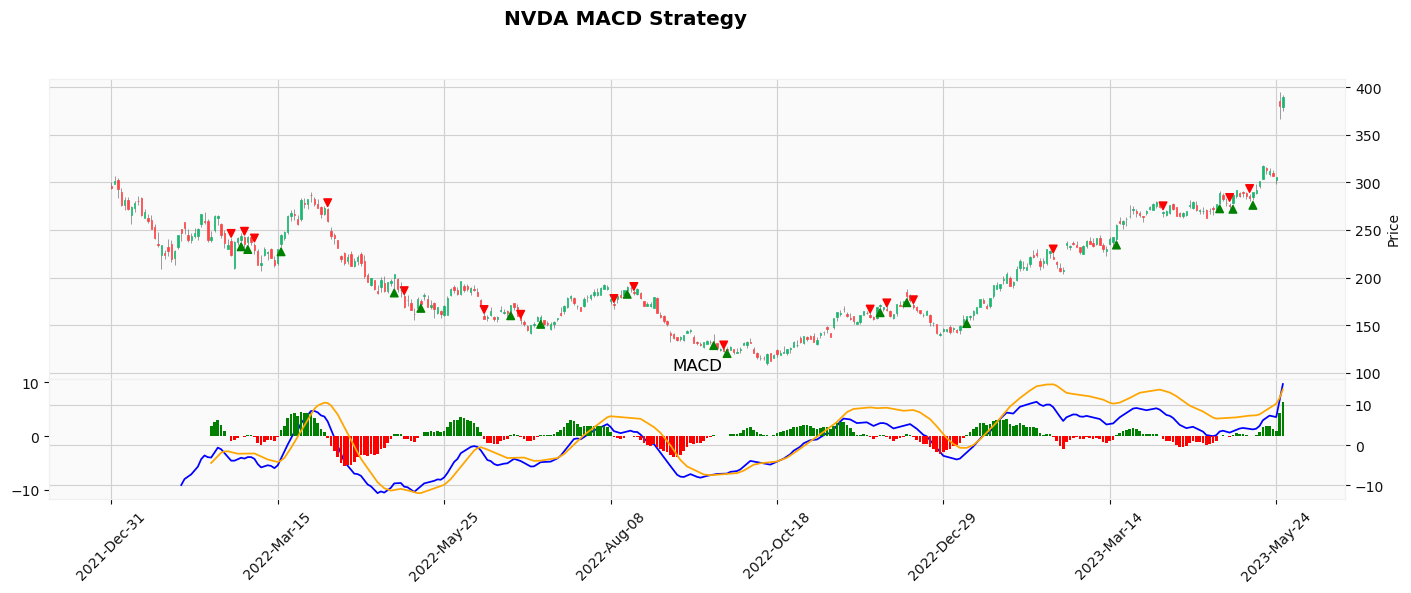

In [250]:
mpf.plot(data_yh, type = 'candle', style = 'yahoo', addplot = g, figsize = (18,6), title = stock_name + ' MACD Strategy')

In [233]:
test = data_yh.copy()

In [234]:
test['action_price'] = test['open'].shift(-1)

In [235]:
test_record = test[test.action.notnull()]
test_record['return'] = test_record['action_price'].pct_change(1)
test_record.head(5)

C:\Users\User\AppData\Local\Temp/ipykernel_48584/3031545057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_record['return'] = test_record['action_price'].pct_change(1)


,open,high,low,close,adjusted close,volume,macd,signal_line,histogram,shift_hist,action,marker_position,action_price,return
Date,,,,,,,,,,,,,,
2022-02-23,238.020004,241.550003,223.009995,223.869995,223.622879,56651100,-3.852478,-3.004777,-0.847700,0.136025,sell,246.381003,210.149994,NaN
2022-02-28,239.919998,246.649994,237.070007,243.850006,243.580841,47731900,-3.132992,-3.228976,0.095984,-0.306440,buy,232.328607,242.910004,0.155889
2022-03-01,242.910004,243.770004,231.320007,234.770004,234.510834,41205600,-3.331998,-3.249580,-0.082417,0.095984,sell,248.645404,237.559998,-0.022025
2022-03-02,237.559998,244.089996,234.149994,242.199997,241.973862,38964200,-2.968777,-3.193420,0.224643,-0.082417,buy,229.466994,242.619995,0.021300
2022-03-04,233.839996,236.800003,224.820007,229.360001,229.145859,43141500,-3.411608,-3.200673,-0.210935,0.181920,sell,241.536003,228.169998,-0.059558


In [236]:
test_record.reset_index(inplace=True)
test_record.columns

Index(['Date', 'open', 'high', 'low', 'close', 'adjusted close', 'volume',
       'macd', 'signal_line', 'histogram', 'shift_hist', 'action',
       'marker_position', 'action_price', 'return'],
      dtype='object')

In [237]:
test_record.loc[:,'previous_signal_date'] = test_record.loc[:,'Date'].shift(1)
test_record.loc[:,'previous_action'] = test_record.loc[:,'action'].shift(1)
test_record.loc[:,'previous_action_price'] = test_record.loc[:,'action_price'].shift(1)
test_record.rename(columns={'Date':'today_signal_date'},inplace=True)

test_record.head(5)

c:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,today_signal_date,open,high,low,close,adjusted close,volume,macd,signal_line,histogram,shift_hist,action,marker_position,action_price,return,previous_signal_date,previous_action,previous_action_price
0,2022-02-23,238.020004,241.550003,223.009995,223.869995,223.622879,56651100,-3.852478,-3.004777,-0.847700,0.136025,sell,246.381003,210.149994,NaN,NaT,NaN,NaN
1,2022-02-28,239.919998,246.649994,237.070007,243.850006,243.580841,47731900,-3.132992,-3.228976,0.095984,-0.306440,buy,232.328607,242.910004,0.155889,2022-02-23,sell,210.149994
2,2022-03-01,242.910004,243.770004,231.320007,234.770004,234.510834,41205600,-3.331998,-3.249580,-0.082417,0.095984,sell,248.645404,237.559998,-0.022025,2022-02-28,buy,242.910004
3,2022-03-02,237.559998,244.089996,234.149994,242.199997,241.973862,38964200,-2.968777,-3.193420,0.224643,-0.082417,buy,229.466994,242.619995,0.021300,2022-03-01,sell,237.559998
4,2022-03-04,233.839996,236.800003,224.820007,229.360001,229.145859,43141500,-3.411608,-3.200673,-0.210935,0.181920,sell,241.536003,228.169998,-0.059558,2022-03-02,buy,242.619995


In [238]:
test_record = test_record[['action','today_signal_date','action_price','return','previous_signal_date','previous_action','previous_action_price']]

In [239]:
profit = test_record[test_record.action == 'buy']

In [240]:
profit

,action,today_signal_date,action_price,return,previous_signal_date,previous_action,previous_action_price
1,buy,2022-02-28,242.910004,0.155889,2022-02-23,sell,210.149994
3,buy,2022-03-02,242.619995,0.021300,2022-03-01,sell,237.559998
5,buy,2022-03-16,241.199997,0.057107,2022-03-04,sell,228.169998
7,buy,2022-05-04,198.669998,-0.203216,2022-04-05,sell,249.339996
9,buy,2022-05-16,180.740005,0.021765,2022-05-09,sell,176.889999
11,buy,2022-06-24,173.119995,0.100502,2022-06-13,sell,157.309998
13,buy,2022-07-08,155.259995,0.010741,2022-06-29,sell,153.610001
15,buy,2022-08-15,189.199997,0.069047,2022-08-09,sell,176.979996
17,buy,2022-09-21,130.699997,-0.285831,2022-08-17,sell,183.009995
19,buy,2022-09-27,124.099998,-0.007756,2022-09-26,sell,125.070000


<AxesSubplot:>

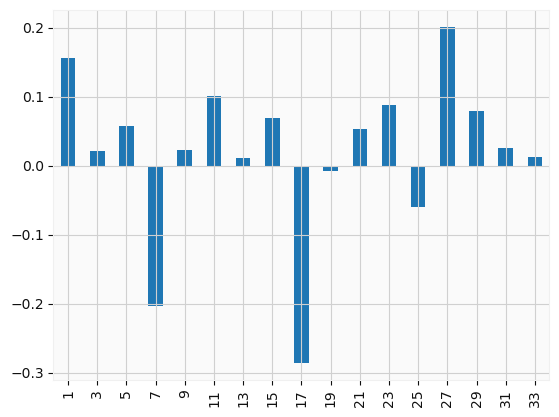

In [241]:
profit['return'].plot(kind='bar')

In [242]:
def strategy_return(df, action_price = 'open', long_or_short = 'long'):
    
  action_df = df.loc[df['action'].notnull()]

  if action_price == 'open':
    df['action_price'] = df['open'].shift(-1)
    action_df['return'] = action_df['action_price'].pct_change()

  elif action_price == 'close':
    df['action_price'] = df['close']
    action_df['return'] = action_df['action_price'].pct_change()

  elif action_price == 'adjusted close':
    df['action_price'] = df['adjusted close']
    action_df['return'] = action_df['action_price'].pct_change()

  else:
    raise ValueError('Not correct action price, choose between {open, close, adjusted close}')

  record_df = action_df[['action','action_price','return']]
  record_df.reset_index(inplace=True)
  record_df['previous_signal_date'] = record_df['Date'].shift(1)
  record_df['previous_action'] = record_df['action'].shift(1)
  record_df['previous_action_price'] = record_df['action_price'].shift(1)
  record_df.rename(columns={'Date':'signal_date'},inplace=True)

  if long_or_short == 'long':
    summary_df = record_df[record_df.action == 'sell']

  elif long_or_short == 'short':    
    summary_df = record_df[record_df.action == 'buy']
    summary_df['return'] = summary_df['return'] * -1

  else:
    raise ValueError('Not correct long_or_short, choose between {long ,short}')  

  return action_df, record_df, summary_df

In [243]:
starter = macd_func(data_yh)

In [244]:
starter

,open,high,low,close,adjusted close,volume,macd,signal_line,histogram,shift_hist,action,marker_position
Date,,,,,,,,,,,,
2021-12-31,296.739990,300.299988,293.309998,294.109985,293.785339,26653000,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-03,298.149994,307.109985,297.850006,301.209991,300.877502,39154700,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,302.769989,304.679993,283.489990,292.899994,292.576691,52715400,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-05,289.489990,294.160004,275.329987,276.040009,275.735321,49806400,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-06,276.399994,284.380005,270.649994,281.779999,281.468964,45418600,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-22,309.010010,315.200012,306.799988,311.760010,311.760010,37200000,7.334812,5.452118,1.882694,1.940222,NaN,NaN
2023-05-23,310.000000,312.880005,306.309998,306.880005,306.880005,35625300,7.242898,5.810274,1.432624,1.882694,NaN,NaN
2023-05-24,302.100006,306.070007,298.059998,305.380005,305.380005,72141900,6.976490,6.043517,0.932973,1.432624,NaN,NaN


In [246]:
action_df, record_df, summary_df = strategy_return(starter, action_price = 'open', long_or_short = 'long')

C:\Users\User\AppData\Local\Temp/ipykernel_48584/3312753607.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_df['return'] = action_df['action_price'].pct_change()
C:\Users\User\AppData\Local\Temp/ipykernel_48584/3312753607.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  record_df['previous_signal_date'] = record_df['Date'].shift(1)
C:\Users\User\AppData\Local\Temp/ipykernel_48584/3312753607.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

<AxesSubplot:>

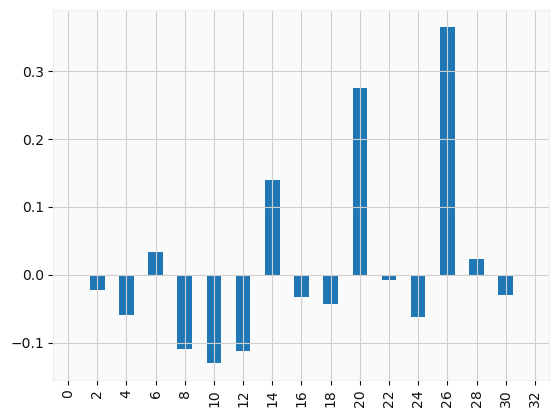

In [247]:
summary_df['return'].plot(kind='bar')

In [248]:
summary_df

,signal_date,action,action_price,return,previous_signal_date,previous_action,previous_action_price
0,2022-02-23,sell,210.149994,NaN,NaT,NaN,NaN
2,2022-03-01,sell,237.559998,-0.022025,2022-02-28,buy,242.910004
4,2022-03-04,sell,228.169998,-0.059558,2022-03-02,buy,242.619995
6,2022-04-05,sell,249.339996,0.033748,2022-03-16,buy,241.199997
8,2022-05-09,sell,176.889999,-0.109629,2022-05-04,buy,198.669998
10,2022-06-13,sell,157.309998,-0.129634,2022-05-16,buy,180.740005
12,2022-06-29,sell,153.610001,-0.112696,2022-06-24,buy,173.119995
14,2022-08-09,sell,176.979996,0.139894,2022-07-08,buy,155.259995
16,2022-08-17,sell,183.009995,-0.032717,2022-08-15,buy,189.199997
18,2022-09-26,sell,125.070000,-0.043076,2022-09-21,buy,130.699997


In [249]:
summary_df['return'].mean()

0.014248037130637728